Found 4800 images belonging to 2 classes.
Found 208 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.
Epoch 1/20
150/150 [==============================] - 670s 4s/step - loss: 0.6998 - accuracy: 0.5412 - val_loss: 0.6522 - val_accuracy: 0.6198
Epoch 2/20
150/150 [==============================] - 680s 5s/step - loss: 0.6406 - accuracy: 0.6398 - val_loss: 0.5956 - val_accuracy: 0.6667
Epoch 3/20
150/150 [==============================] - 628s 4s/step - loss: 0.6117 - accuracy: 0.6667 - val_loss: 0.5979 - val_accuracy: 0.6875
Epoch 4/20
150/150 [==============================] - 856s 6s/step - loss: 0.5687 - accuracy: 0.7015 - val_loss: 0.4939 - val_accuracy: 0.7448
Epoch 5/20
150/150 [==============================] - 599s 4s/step - loss: 0.5422 - accuracy: 0.7192 - val_loss: 0.4728 - val_accuracy: 0.7448
Epoch 6/20
150/150 [==============================] - 565s 4s/step - loss: 0.5140 - accuracy: 0.7458 - val_loss: 0.4962 - val_accuracy: 0.7500
Epoch 7/20
150/15

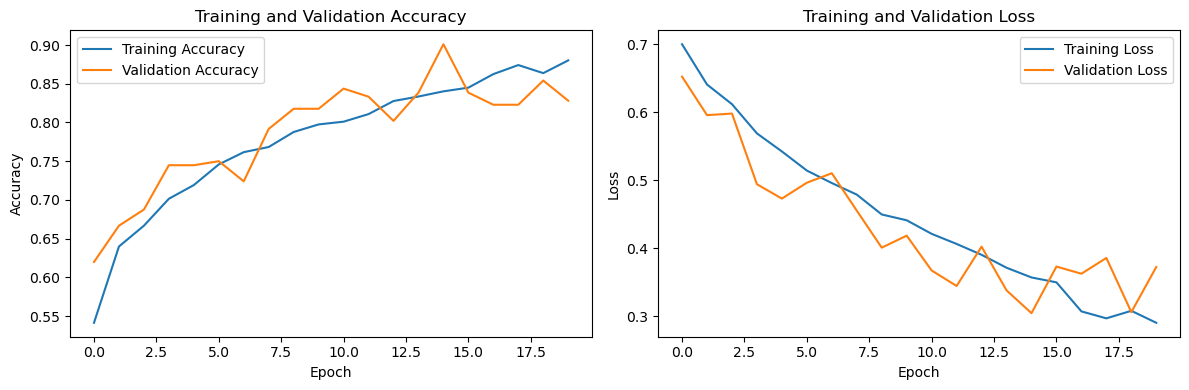

INFO:tensorflow:Assets written to: Dogs_vs_cats_CNNs_Classification2\assets


INFO:tensorflow:Assets written to: Dogs_vs_cats_CNNs_Classification2\assets


In [1]:
#import necessary libraries and modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.utils import to_categorical

# Define constants
IMAGE_SIZE = 128
BATCH_SIZE = 32
NUM_CLASSES = 2
EPOCHS = 20

# Load and preprocess data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    'dataset2/train',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'dataset2/validation',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    'dataset2/test',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Build the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Confusion matrix and classification report
test_labels = test_generator.classes
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(test_labels, predicted_labels)
class_report = classification_report(test_labels, predicted_labels, target_names=train_generator.class_indices)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

#save model
model.save('Dogs_vs_cats_CNNs_Classification2')